# Assignment-3

## 1.Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 2.Load the Dataset

In [1]:
headers = ["sepal.length","sepal.width","petal.length","petal.width","variety"]

In [4]:
df = pd.read_csv("C:/Users/Siddhant/Desktop/iris.csv",names = headers)

In [5]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,sepal.length,sepal.width,petal.length,petal.width,variety
1,5.1,3.5,1.4,.2,Setosa
2,4.9,3,1.4,.2,Setosa
3,4.7,3.2,1.3,.2,Setosa
4,4.6,3.1,1.5,.2,Setosa


## 3.Data Preprocessing

In [8]:
df.replace("?",np.nan,inplace=True)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,sepal.length,sepal.width,petal.length,petal.width,variety
1,5.1,3.5,1.4,.2,Setosa
2,4.9,3,1.4,.2,Setosa
3,4.7,3.2,1.3,.2,Setosa
4,4.6,3.1,1.5,.2,Setosa


In [9]:
missing_data = df.isnull()
missing_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

sepal.length
False    151
Name: sepal.length, dtype: int64

sepal.width
False    151
Name: sepal.width, dtype: int64

petal.length
False    151
Name: petal.length, dtype: int64

petal.width
False    151
Name: petal.width, dtype: int64

variety
False    151
Name: variety, dtype: int64



In [23]:
df['sepal.length'] = pd.to_numeric(df['sepal.length'],errors='coerce')

In [26]:
avg_sepal_length = df["sepal.length"].astype("float").mean(axis=0)
print("Average of Sepal Length:", avg_sepal_length)

Average of Sepal Length: 5.843333333333334


In [27]:
df["sepal.length"].replace(np.nan, avg_sepal_length, inplace=True)

In [28]:
df['sepal.width'] = pd.to_numeric(df['sepal.width'],errors='coerce')

In [29]:
avg_sepal_width = df["sepal.width"].astype("float").mean(axis=0)
print("Average of Sepal Width:", avg_sepal_width)

Average of Sepal Width: 3.0573333333333337


In [30]:
df["sepal.width"].replace(np.nan, avg_sepal_width, inplace=True)

In [31]:
df['petal.length'] = pd.to_numeric(df['petal.length'],errors='coerce')

In [32]:
avg_petal_length = df["petal.length"].astype("float").mean(axis=0)
print("Average of Petal Length:", avg_petal_length)

Average of Petal Length: 3.7579999999999996


In [33]:
df["petal.length"].replace(np.nan, avg_petal_length, inplace=True)

In [34]:
df['petal.width'] = pd.to_numeric(df['petal.width'],errors='coerce')

In [35]:
avg_petal_width = df["petal.width"].astype("float").mean(axis=0)
print("Average of Petal Width:", avg_petal_width)

Average of Petal Width: 1.1993333333333336


In [36]:
df["petal.width"].replace(np.nan, avg_petal_length, inplace=True)

In [37]:
df['sepal.length'].value_counts().idxmax()

5.0

In [38]:
df["sepal.length"].replace(np.nan, 'four', inplace=True)

In [39]:
df.dropna(subset=['petal.width'], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [40]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.843333,3.057333,3.758,3.758,variety
1,5.100000,3.500000,1.400,0.200,Setosa
2,4.900000,3.000000,1.400,0.200,Setosa
3,4.700000,3.200000,1.300,0.200,Setosa
4,4.600000,3.100000,1.500,0.200,Setosa


In [42]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [43]:
# Data Standardization
df['sepal.length'] = 235/df['sepal.length']
df.rename(columns={'sepal.length':'length-sepal'}, inplace=True)
df['sepal.width'] = 235/df['sepal.width']
df.rename(columns={'sepal.width':'width-sepal'}, inplace=True)
df.head()

,length-sepal,width-sepal,petal.length,petal.width,variety
0,40.216771,76.864370,3.758,3.758,variety
1,46.078431,67.142857,1.400,0.200,Setosa
2,47.959184,78.333333,1.400,0.200,Setosa
3,50.000000,73.437500,1.300,0.200,Setosa
4,51.086957,75.806452,1.500,0.200,Setosa


In [44]:
# Data Normalization

df['length-sepal'] = df['length-sepal']/df['length-sepal'].max()
df['width-sepal'] = df['width-sepal']/df['width-sepal'].max()
df['petal.length'] = df['petal.length']/df['petal.length'].max()
df[['length-sepal','width-sepal','petal.length']].head()

,length-sepal,width-sepal,petal.length
0,0.735881,0.654165,0.544638
1,0.843137,0.571429,0.202899
2,0.877551,0.666667,0.202899
3,0.914894,0.625000,0.188406
4,0.934783,0.645161,0.217391


Text(0.5, 1.0, 'Width of Sepals')

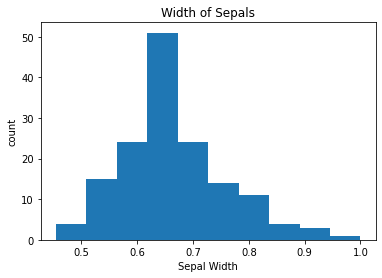

In [45]:
# Binning-1
df['width-sepal'] = df['width-sepal'].astype("float", copy=True)
plt.hist(df['width-sepal'])

# Set x&y-labels and plot title
plt.xlabel('Sepal Width')
plt.ylabel('count')
plt.title('Width of Sepals')

In [46]:
# Binning-2
bins = np.linspace(min(df['width-sepal']),max(df['width-sepal']),4)
bins

array([0.45454545, 0.63636364, 0.81818182, 1.        ])

In [47]:
group_names = ['Low','Medium','High']
df['width-sepal-binned'] = pd.cut(df['width-sepal'], bins, labels=group_names, include_lowest=True)
df[['width-sepal','width-sepal-binned']].head(20)

,width-sepal,width-sepal-binned
0,0.654165,Medium
1,0.571429,Low
2,0.666667,Medium
3,0.625000,Low
4,0.645161,Medium
5,0.555556,Low
6,0.512821,Low
7,0.588235,Low
8,0.588235,Low
9,0.689655,Medium


In [48]:
df['width-sepal-binned'].value_counts()

Medium    84
Low       56
High      11
Name: width-sepal-binned, dtype: int64

Text(0.5, 1.0, 'Sepal Width Bins')

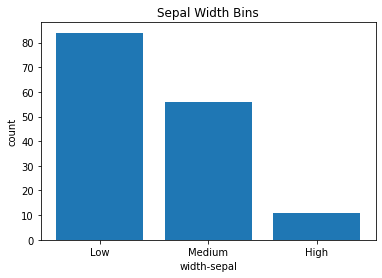

In [49]:
plt.bar(group_names, df['width-sepal-binned'].value_counts())
plt.xlabel('width-sepal')
plt.ylabel('count')
plt.title('Sepal Width Bins')

Text(0.5, 1.0, 'Sepal Width Bins')

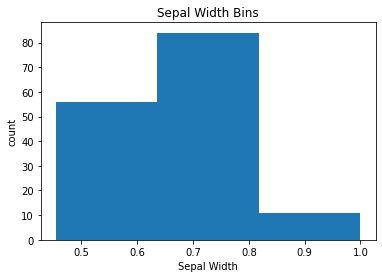

In [50]:
plt.hist(df['width-sepal'], bins=3)
plt.xlabel('Sepal Width')
plt.ylabel('count')
plt.title('Sepal Width Bins')

In [51]:
df.head()

,length-sepal,width-sepal,petal.length,petal.width,variety,width-sepal-binned
0,0.735881,0.654165,0.544638,3.758,variety,Medium
1,0.843137,0.571429,0.202899,0.200,Setosa,Low
2,0.877551,0.666667,0.202899,0.200,Setosa,Medium
3,0.914894,0.625000,0.188406,0.200,Setosa,Low
4,0.934783,0.645161,0.217391,0.200,Setosa,Medium


In [52]:
# Dummy Variables-1
dv1 = pd.get_dummies(df['variety'])
dv1.rename(columns={'Setosa':'variety-setosa','Versicolor':'variety-Versicolor','Virginica':'variety-Virginica'}, inplace=True)
dv1.head()

,variety-setosa,variety-Versicolor,variety-Virginica,variety
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [53]:
# Merging dataframe 'df' and 'dv1'
df = pd.concat([df, dv1], axis=1)

#drop original column "variety" from "df"
df.drop("variety", axis=1, inplace=True)

In [54]:
df.head()

,length-sepal,width-sepal,petal.length,petal.width,width-sepal-binned,variety-setosa,variety-Versicolor,variety-Virginica
0,0.735881,0.654165,0.544638,3.758,Medium,0,0,0
1,0.843137,0.571429,0.202899,0.200,Low,1,0,0
2,0.877551,0.666667,0.202899,0.200,Medium,1,0,0
3,0.914894,0.625000,0.188406,0.200,Low,1,0,0
4,0.934783,0.645161,0.217391,0.200,Medium,1,0,0


In [55]:
# Dummy Variables-2
dv2 = pd.get_dummies(df['variety-setosa'])
dv2.rename(columns={'0':'1','1':'0'}, inplace=True)
dv2.head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [57]:
# Merging dataframe 'df' and 'dv2'
df = pd.concat([df, dv2], axis=1)

#drop original column "variety-setosa" from "df"
df.drop("variety-setosa", axis=1, inplace=True)

df.head()

,length-sepal,width-sepal,petal.length,petal.width,width-sepal-binned,variety-Versicolor,variety-Virginica,0,1,0,1
0,0.735881,0.654165,0.544638,3.758,Medium,0,0,1,0,1,0
1,0.843137,0.571429,0.202899,0.200,Low,0,0,0,1,0,1
2,0.877551,0.666667,0.202899,0.200,Medium,0,0,0,1,0,1
3,0.914894,0.625000,0.188406,0.200,Low,0,0,0,1,0,1
4,0.934783,0.645161,0.217391,0.200,Medium,0,0,0,1,0,1


In [58]:
df.corr()

,length-sepal,width-sepal,petal.length,petal.width,variety-Versicolor,variety-Virginica,0,1,0,1
length-sepal,1.000000,-0.101363,-0.878977,-0.805122,-0.138497,-0.614499,-0.754953,0.754953,-0.754953,0.754953
width-sepal,-0.101363,1.000000,0.375251,0.296847,0.470021,0.093171,0.561240,-0.561240,0.561240,-0.561240
petal.length,-0.878977,0.375251,1.000000,0.928617,0.201421,0.719820,0.921241,-0.921241,0.921241,-0.921241
petal.width,-0.805122,0.296847,0.928617,1.000000,0.098332,0.725665,0.869554,-0.869554,0.869554,-0.869554
variety-Versicolor,-0.138497,0.470021,0.201421,0.098332,1.000000,-0.495050,0.495050,-0.495050,0.495050,-0.495050
variety-Virginica,-0.614499,0.093171,0.719820,0.725665,-0.495050,1.000000,0.495050,-0.495050,0.495050,-0.495050
0,-0.754953,0.561240,0.921241,0.869554,0.495050,0.495050,1.000000,-1.000000,1.000000,-1.000000
1,0.754953,-0.561240,-0.921241,-0.869554,-0.495050,-0.495050,-1.000000,1.000000,-1.000000,1.000000
0,-0.754953,0.561240,0.921241,0.869554,0.495050,0.495050,1.000000,-1.000000,1.000000,-1.000000
1,0.754953,-0.561240,-0.921241,-0.869554,-0.495050,-0.495050,-1.000000,1.000000,-1.000000,1.000000


(0.0, 3.9682317375363922)

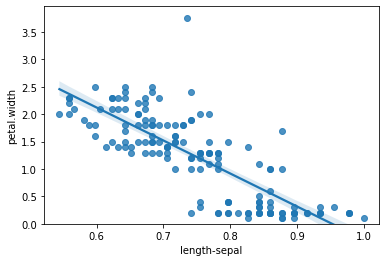

In [59]:
sns.regplot(x="length-sepal", y="petal.width", data=df)
plt.ylim(0,)

In [60]:
df[["length-sepal","petal.width"]].corr()

,length-sepal,petal.width
length-sepal,1.000000,-0.805122
petal.width,-0.805122,1.000000


<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

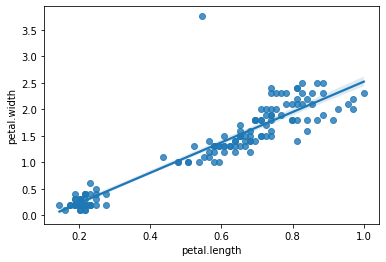

In [61]:
sns.regplot(x="petal.length", y="petal.width", data=df)

In [62]:
df[["petal.length","petal.width"]].corr()

,petal.length,petal.width
petal.length,1.000000,0.928617
petal.width,0.928617,1.000000


<AxesSubplot:xlabel='length-sepal', ylabel='width-sepal'>

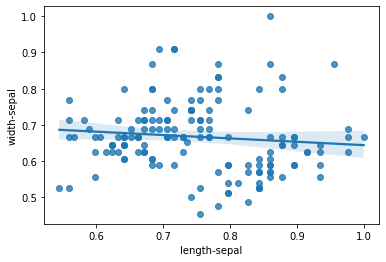

In [63]:
sns.regplot(x="length-sepal", y="width-sepal", data=df)

In [64]:
df[['length-sepal','width-sepal']].corr()

,length-sepal,width-sepal
length-sepal,1.000000,-0.101363
width-sepal,-0.101363,1.000000


## 4. Independent & Dependent

In [71]:
# dependant variable
y= df['petal.width']

# independant variable
x= df.drop('petal.width', axis=1)

In [73]:
x.head()

,length-sepal,width-sepal,petal.length,width-sepal-binned,variety-Versicolor,variety-Virginica,0,1,0,1
0,0.735881,0.654165,0.544638,Medium,0,0,1,0,1,0
1,0.843137,0.571429,0.202899,Low,0,0,0,1,0,1
2,0.877551,0.666667,0.202899,Medium,0,0,0,1,0,1
3,0.914894,0.625000,0.188406,Low,0,0,0,1,0,1
4,0.934783,0.645161,0.217391,Medium,0,0,0,1,0,1


## 5. Train,Test & Split

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [82]:
!pip3 install -U scikit-learn scipy matplotlib

In [83]:
print(x_train.shape) #training input
print(x_test.shape)#testing input
print(y_train.shape) #training output
print(y_test.shape)#testing output

(135, 10)
(16, 10)
(135,)
(16,)


## 6. Build ML Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

In [85]:
x_test

,length-sepal,width-sepal,petal.length,width-sepal-binned,variety-Versicolor,variety-Virginica,0,1,0,1
14,1.000000,0.666667,0.159420,Medium,0,0,0,1,0,1
98,0.693548,0.689655,0.623188,Medium,1,0,1,0,1,0
75,0.671875,0.689655,0.623188,Medium,1,0,1,0,1,0
16,0.754386,0.454545,0.217391,Low,0,0,0,1,0,1
131,0.581081,0.714286,0.884058,Medium,0,1,1,0,1,0
56,0.754386,0.714286,0.652174,Medium,1,0,1,0,1,0
141,0.641791,0.645161,0.811594,Medium,0,1,1,0,1,0
44,0.860000,0.571429,0.231884,Low,0,0,0,1,0,1
29,0.826923,0.588235,0.202899,Low,0,0,0,1,0,1
120,0.716667,0.909091,0.724638,High,0,1,1,0,1,0


In [86]:
y_test

14     0.1
98     1.3
75     1.3
16     0.4
131    1.9
56     1.3
141    2.4
44     0.6
29     0.2
120    1.5
94     1.0
5      0.2
102    1.9
51     1.4
78     1.7
42     0.3
Name: petal.width, dtype: float64

## 7. Calculate the R2_Score

In [ ]:
y_pred = lr.predict(x_test)
y_pred

In [ ]:
lr.score(x_test, y_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(lr.predict(x_test),y_test)

In [ ]:
r2_score(lr.predict(x_train),y_train)